## Importing Required Libraries

In [385]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [400]:
# Load the image
image_path = 'input/coins1.png'  # Replace with your image file
image = cv2.imread(image_path)

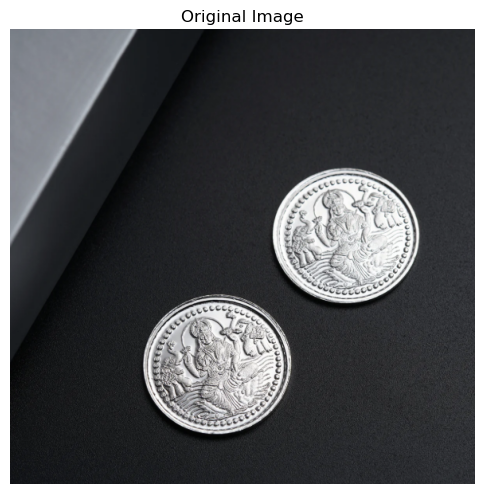

In [401]:
# Display original image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

In [402]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

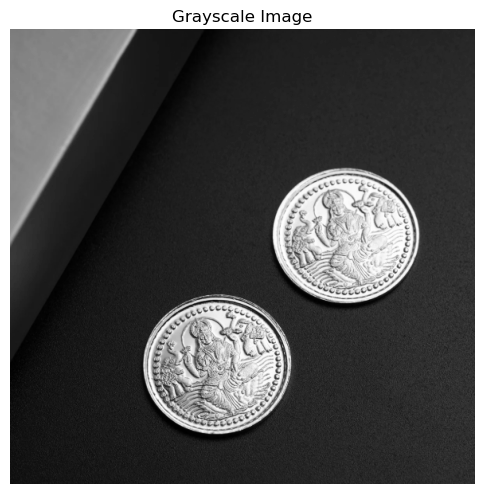

In [403]:
# Display grayscale image
plt.figure(figsize=(6, 6))
plt.imshow(gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")
plt.show()

In [404]:
#contrast stretching
min_val = np.min(gray)
max_val = np.max(gray)
stretched = ((gray - min_val) / (max_val - min_val) * 255).astype(np.uint8)



In [405]:
# Preprocessing: Apply median Blur
blurred = cv2.medianBlur(stretched, 11)

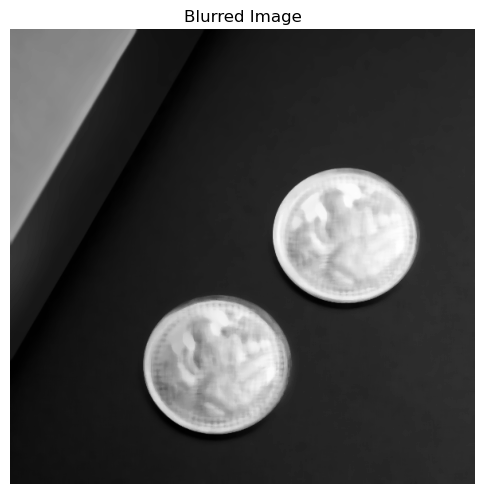

In [406]:
# Display blurred image
plt.figure(figsize=(6, 6))
plt.imshow(blurred, cmap='gray')
plt.title("Blurred Image")
plt.axis("off")
plt.show()

In [407]:
# Apply Adaptive Thresholding
binary = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)


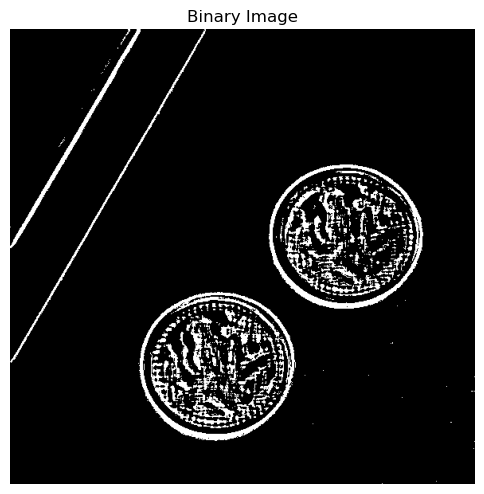

In [408]:
# Display binary image
plt.figure(figsize=(6, 6))
plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()


In [409]:
# Find contours
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
outer_contours = [cnt for i, cnt in enumerate(contours) if hierarchy[0][i][3] == -1]


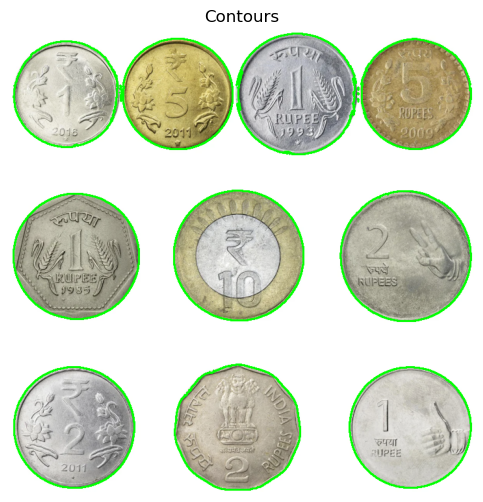

In [399]:
# Draw contours on the original image
image_copy = image.copy()
cv2.drawContours(image_copy, outer_contours, -1, (0, 255, 0), 2)
# Display contour image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title("Contours")
plt.axis("off")
plt.show()

